# Importing Libraries

In [62]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

# Importing data

In [63]:
df=pd.read_csv('Win_Prediction_Data.xlsx - Sheet1.csv')
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,1-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,3-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [64]:
data=df.drop(['Deal Status Code'],axis=1)
target=df[['Deal Status Code']]
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88
2,Internal,Solution 59,1-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00
4,Internal,Solution 32,3-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35


In [65]:
data.isnull().sum()

Client Category    79
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
dtype: int64

<AxesSubplot:>

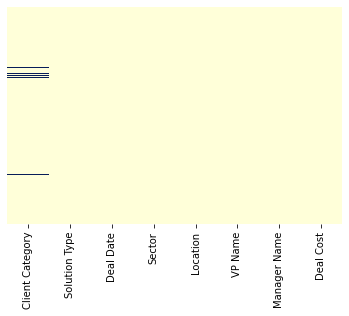

In [66]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [67]:
target=df[['Deal Status Code']]

# EDA

In [68]:
data.info()                  #client category has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Client Category  9982 non-null   object 
 1   Solution Type    10061 non-null  object 
 2   Deal Date        10061 non-null  object 
 3   Sector           10061 non-null  object 
 4   Location         10061 non-null  object 
 5   VP Name          10061 non-null  object 
 6   Manager Name     10061 non-null  object 
 7   Deal Cost        10061 non-null  float64
dtypes: float64(1), object(7)
memory usage: 628.9+ KB


In [69]:
data.isnull().sum()

Client Category    79
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
dtype: int64

In [70]:
data.shape

(10061, 8)

In [71]:
Client_Category=data['Client Category'].value_counts()

In [72]:
data.describe()

,Deal Cost
count,1.006100e+04
mean,7.668969e+05
std,1.619894e+06
min,0.000000e+00
25%,1.897059e+05
50%,3.823529e+05
75%,7.647059e+05
max,3.676471e+07


# Data Preprocessing

In [73]:
data['Client Category'].mode()

0    Others
dtype: object

In [74]:
data['Client Category']=data['Client Category'].fillna(data['Client Category'].mode()[0])

<AxesSubplot:>

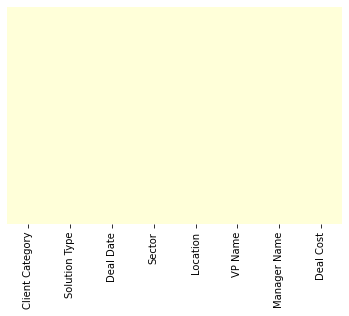

In [75]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [76]:
data.describe(include='O')              #O-object

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name
count,10061,10061,10061,10061,10061,10061,10061
unique,41,67,2555,25,13,43,278
top,Others,Solution 32,27-Jul-18,Sector 23,L10,Mervin Harwood,Molly Eakes
freq,1842,1439,15,2693,3360,1166,323


In [77]:
data.head(2)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88


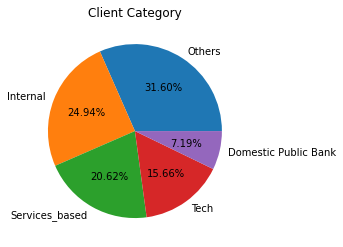

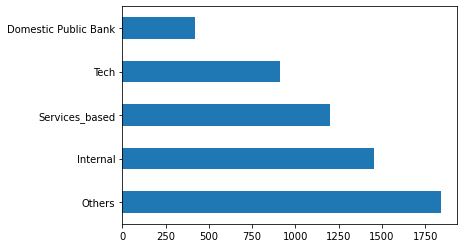

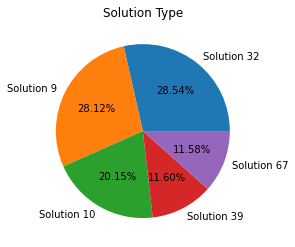

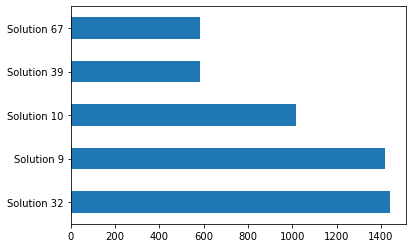

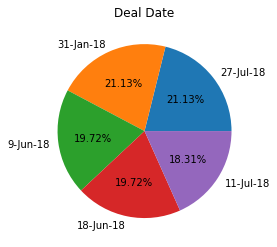

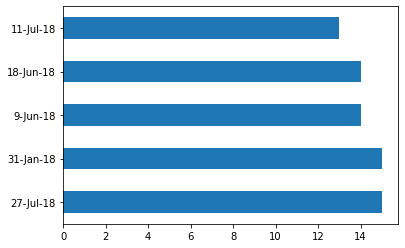

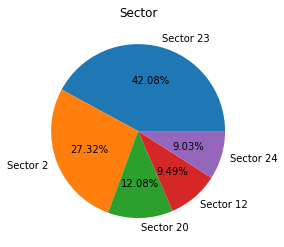

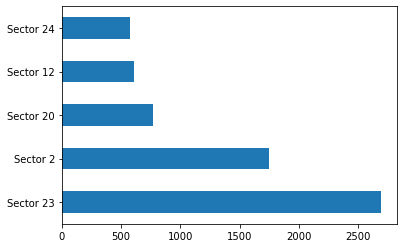

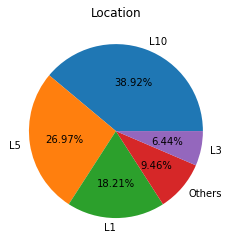

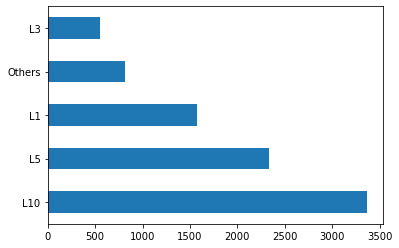

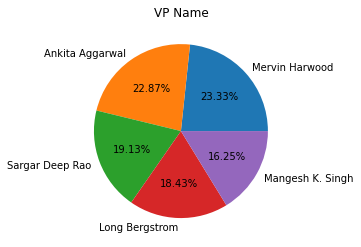

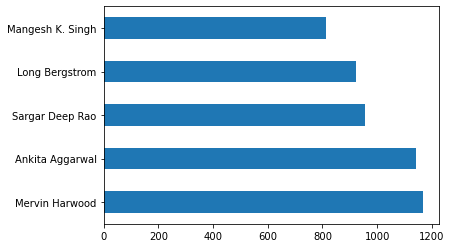

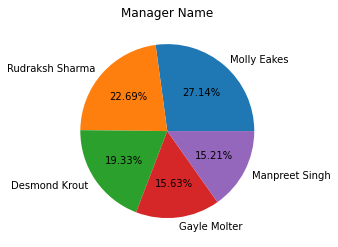

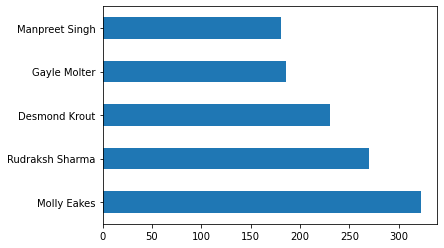

In [78]:
for col in data.columns:
     if data[col].dtype == 'object':
            plt_data=data[col].value_counts()
            data_index=data[col].value_counts().index
            plt.pie(plt_data[:5],labels=data_index[:5],autopct='%1.2f%%')
            plt.title(col)
            plt.show()
            plt_data[:5].plot(kind='barh')
            plt.show()

In [79]:
Deal_Status_code=df['Deal Status Code'].value_counts()
Deal_Status_code

Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64

In [80]:
Deal_Status_code_index=df['Deal Status Code'].value_counts().index

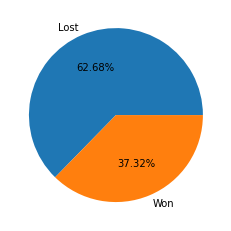

In [81]:
plt.pie(Deal_Status_code,labels=Deal_Status_code_index,autopct="%1.2f%%")
plt.show()

<AxesSubplot:>

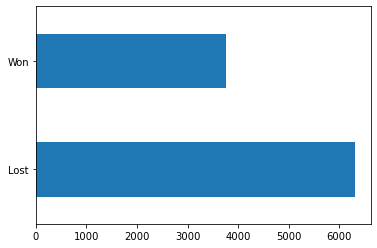

In [82]:
Deal_Status_code.plot(kind='barh')

# Relation between target variable and Independent variables

In [83]:
re_client_cat=df[['Client Category','Deal Status Code']].groupby(['Client Category',
                            'Deal Status Code']).size().reset_index().rename(columns={0:'Deal status count'})
re_client_cat

,Client Category,Deal Status Code,Deal status count
0,Airpline,Lost,22
1,Airpline,Won,5
2,Automobiles,Lost,112
3,Automobiles,Won,66
4,Consulting,Lost,182
...,...,...,...
77,Tech,Won,313
78,Telecom,Lost,192
79,Telecom,Won,135
80,e-commerce,Lost,20


In [84]:
for col in data.columns:
    col_reln=df[[col,'Deal Status Code']].groupby([col,'Deal Status Code']).size().reset_index().rename(columns={0:'Deal status count'})
    print('\n')
    print('\033[1m'+col+'\033[0m')
    print(col_reln)



Client Category
   Client Category Deal Status Code  Deal status count
0         Airpline             Lost                 22
1         Airpline              Won                  5
2      Automobiles             Lost                112
3      Automobiles              Won                 66
4       Consulting             Lost                182
..             ...              ...                ...
77            Tech              Won                313
78         Telecom             Lost                192
79         Telecom              Won                135
80      e-commerce             Lost                 20
81      e-commerce              Won                 12

[82 rows x 3 columns]


Solution Type
    Solution Type Deal Status Code  Deal status count
0      Solution 1             Lost                  2
1      Solution 1              Won                  3
2     Solution 10             Lost                690
3     Solution 10              Won                326
4     Solutio

In [85]:
for col in data.columns[:7]:
    pvt_table=pd.pivot_table(df,index='Deal Status Code',values='Deal Cost',
                   columns=col)
    print('\033[1m'+col+'\033[0m')
    print(pvt_table)
    print('\n')

Client Category
Client Category        Airpline    Automobiles    Consulting  Consumer Good  \
Deal Status Code                                                              
Lost              482887.701818  706355.042679  6.088462e+05  629885.954898   
Won               549411.768000  537281.641061  1.528884e+06  859452.332644   

Client Category   Domestic Bank  Domestic Private Bank  Domestic Public Bank  \
Deal Status Code                                                               
Lost               1.495498e+06          881407.086023          1.070093e+06   
Won                1.919716e+06          688611.491860          5.993003e+05   

Client Category     Electronics        Energy        Energy   ...  \
Deal Status Code                                              ...   
Lost              553812.637407  1.557206e+06  694726.890714  ...   
Won               596633.987407  6.761059e+05  926633.987778  ...   

Client Category      Power ind    Real Estate  Research Development  

Manager Name
Manager Name      Aastha Gandhi  Abhinav Warrier  Abhishek Singhal  \
Deal Status Code                                                     
Lost                        NaN    588808.824000     772860.963182   
Won                   242647.06    302235.296667     476956.522609   

Manager Name      Abhiskek Kumar   Abhiskhek  D    Abram Fines  Aditya Kumar  \
Deal Status Code                                                               
Lost               949894.957857  440767.973889  501764.706000     792647.06   
Won                587507.740789  375658.823600  714127.789655     250367.65   

Manager Name      Aditya Tondon   Ahdarsha Jha  Ahswini Saini  ...  \
Deal Status Code                                               ...   
Lost                 1058823.53  924866.311818     1029411.77  ...   
Won                         NaN  351102.940000      601470.59  ...   

Manager Name          shafibul  sharat chandran   sheak shakir  shiv kumar  \
Deal Status Code          

In [86]:
data.head(2)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88


# Data Transformation

In [87]:
data['Deal Date']=pd.to_datetime(data['Deal Date'])

In [88]:
data.head(2)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Client Category  10061 non-null  object        
 1   Solution Type    10061 non-null  object        
 2   Deal Date        10061 non-null  datetime64[ns]
 3   Sector           10061 non-null  object        
 4   Location         10061 non-null  object        
 5   VP Name          10061 non-null  object        
 6   Manager Name     10061 non-null  object        
 7   Deal Cost        10061 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 628.9+ KB


In [90]:
data['Deal_Date_Year']=data['Deal Date'].dt.year
data['Deal_Date_Month']=data['Deal Date'].dt.month
data['Deal_Date_Quarter']=data['Deal Date'].dt.quarter

In [91]:
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal_Date_Year,Deal_Date_Month,Deal_Date_Quarter
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,2012,3,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,2012,9,3
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,2011,8,3
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,2011,4,2
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,2011,6,2


<AxesSubplot:xlabel='Deal_Date_Year', ylabel='Count'>

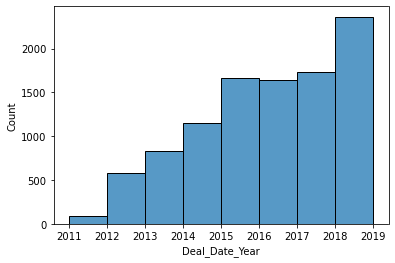

In [92]:
sns.histplot(data['Deal_Date_Year'],bins=8)

<AxesSubplot:xlabel='Deal_Date_Month', ylabel='Count'>

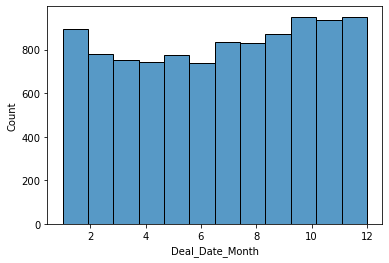

In [93]:
sns.histplot(data['Deal_Date_Month'],bins=12)

<AxesSubplot:xlabel='Deal_Date_Quarter', ylabel='Count'>

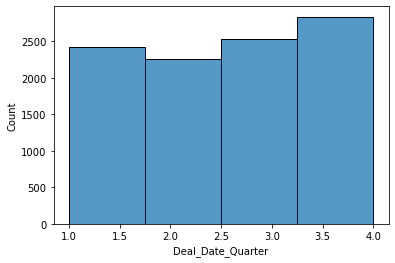

In [94]:
sns.histplot(data['Deal_Date_Quarter'],bins=4)

In [95]:
data=data.drop(['Deal Date'],axis=1)

In [96]:
data.head(2)

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal_Date_Year,Deal_Date_Month,Deal_Date_Quarter
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,2012,3,1
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,2012,9,3


# Data Encoding

In [97]:
label_encoder=preprocessing.LabelEncoder()

In [98]:
cols=['Client Category','Solution Type','Sector','Location','VP Name','Manager Name']

data[cols]=data[cols].apply(label_encoder.fit_transform)

In [99]:
data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal_Date_Year,Deal_Date_Month,Deal_Date_Quarter
0,39,64,16,7,6,82,150000.00,2012,3,1
1,39,64,16,7,6,82,744705.88,2012,9,3
2,19,54,12,12,6,183,60000.00,2011,8,3
3,19,54,12,12,6,183,60000.00,2011,4,2
4,19,25,12,12,6,183,80882.35,2011,6,2


In [100]:
target.head()

,Deal Status Code
0,Won
1,Won
2,Lost
3,Lost
4,Lost


In [101]:
target['Deal Status Code']=label_encoder.fit_transform(target['Deal Status Code'])
target['Deal Status Code'].unique()

array([1, 0])

In [102]:
data=data.iloc[:,0:7]
data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost
0,39,64,16,7,6,82,150000.00
1,39,64,16,7,6,82,744705.88
2,19,54,12,12,6,183,60000.00
3,19,54,12,12,6,183,60000.00
4,19,25,12,12,6,183,80882.35


In [103]:
scaler=preprocessing.StandardScaler()
scaled_data=scaler.fit_transform(data)

In [104]:
scaled_data_df=pd.DataFrame(scaled_data,columns=data.columns)

In [105]:
scaled_data_df.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost
0,1.402995,1.297651,0.785351,0.762917,-1.1112,-0.715444,-0.380844
1,1.402995,1.297651,0.785351,0.762917,-1.1112,-0.715444,-0.013700
2,-0.333393,0.861064,0.016637,2.051956,-1.1112,0.600043,-0.436406
3,-0.333393,0.861064,0.016637,2.051956,-1.1112,0.600043,-0.436406
4,-0.333393,-0.405040,0.016637,2.051956,-1.1112,0.600043,-0.423515


In [106]:
target.head()

,Deal Status Code
0,1
1,1
2,0
3,0
4,0


# Train Validation Split

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(scaled_data_df,target,train_size=0.75,random_state=40)

In [108]:
x_train.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost
7210,-0.507032,-0.448699,2.322778,-0.783929,1.205185,1.524791,-0.373581
8673,0.447982,1.384968,0.593172,-0.526122,-0.283920,-0.481001,-0.342714
2953,0.187523,1.253992,0.016637,0.762917,0.543361,0.587018,-0.291873
6902,-0.420212,-0.143087,-0.944255,0.762917,-0.283920,1.524791,-0.228321
3409,-0.420212,-1.452850,-0.944255,-0.783929,1.205185,0.977757,-0.382660


In [109]:
x_val.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost
1428,0.447982,-1.452850,0.593172,-1.041737,-1.524840,-0.988961,-0.300951
7066,0.447982,1.384968,0.785351,0.762917,0.957001,-0.715444,-0.473448
3230,1.316175,-1.452850,0.593172,-1.041737,-1.524840,-0.350755,-0.415344
5760,0.447982,-0.099429,-2.289504,-0.783929,-0.780288,0.508870,-0.019510
9738,-0.333393,-0.623334,-0.175541,-0.783929,-1.524840,1.694111,-0.437133


# Model Selection

In [110]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [120]:
y_pred_val=logit.predict(x_val)
y_pred_train=logit.predict(x_train)

In [121]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [122]:
print("Acuuracy test:",accuracy_score(y_val,y_pred_val))
print("Acuuracy train:",accuracy_score(y_train,y_pred_train))
print('\n')
print(classification_report(y_val,y_pred_val))
print('\n')
print(classification_report(y_train,y_pred_train))

Acuuracy test: 0.6196343402225755
Acuuracy train: 0.6287607687210073


              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1559
           1       0.00      0.00      0.00       957

    accuracy                           0.62      2516
   macro avg       0.31      0.50      0.38      2516
weighted avg       0.38      0.62      0.47      2516



              precision    recall  f1-score   support

           0       0.63      1.00      0.77      4747
           1       0.33      0.00      0.00      2798

    accuracy                           0.63      7545
   macro avg       0.48      0.50      0.39      7545
weighted avg       0.52      0.63      0.49      7545



In [125]:
print(confusion_matrix(y_val,y_pred_val))
print('\n')
print(confusion_matrix(y_train,y_pred_train))

[[1559    0]
 [ 957    0]]


[[4741    6]
 [2795    3]]


# Cross Validation-K fold method

In [127]:
from sklearn.model_selection import cross_val_score
accuracy_test=cross_val_score(logit,x_val,y_val,cv=10)
accuracy_train=cross_val_score(logit,x_train,y_train,cv=10)
print(accuracy_test)
print('\n')
print(accuracy_train)

[0.61111111 0.61904762 0.61904762 0.61111111 0.61904762 0.61904762
 0.62151394 0.62151394 0.61752988 0.61354582]


[0.62781457 0.62781457 0.62781457 0.62913907 0.62781457 0.62997347
 0.62997347 0.62864721 0.62997347 0.62997347]


In [130]:
#Since the bias is high we are using xgboost

from xgboost import XGBClassifier
xgb_class=XGBClassifier()
xgb_class.fit(x_train,y_train)

[17:26:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
y_pred_xgb_train=xgb_class.predict(x_train)
y_pred_xgb_test=xgb_class.predict(x_val)

In [133]:
print(accuracy_score(y_train,y_pred_xgb_train))
print('\n')
print(accuracy_score(y_val,y_pred_xgb_test))

0.9280318091451292


0.7837837837837838


In [137]:
accuracy_test=cross_val_score(xgb_class,x_val,y_val,cv=25)
print(accuracy_test)

[18:15:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [138]:
print(accuracy_test[17])

0.82


In [ ]:
# Train accuracy-0.9280318091451292
# Test accuracy-0.82

# Random Forest Classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [142]:
y_pred_rfc_train=rfc.predict(x_train)
y_pred_rfc_val=rfc.predict(x_val)

In [143]:
print(accuracy_score(y_train,y_pred_rfc_train))
print('\n')
print(accuracy_score(y_val,y_pred_rfc_val))

0.9970841616964877


0.8203497615262321


In [145]:
from sklearn.model_selection import cross_val_score
accuracy_test=cross_val_score(rfc,x_val,y_val,cv=20)
print(accuracy_test)

[0.73015873 0.75396825 0.66666667 0.71428571 0.66666667 0.65079365
 0.74603175 0.75396825 0.63492063 0.63492063 0.81746032 0.71428571
 0.67460317 0.71428571 0.74603175 0.78571429 0.68       0.784
 0.688      0.712     ]
